Node balances (in_flow, out_flow):
   S: in=0.00, out=1.00
   A: in=0.60, out=0.60
   B: in=0.40, out=0.40
   C: in=0.30, out=0.30
   D: in=0.30, out=0.30
   E: in=0.10, out=0.10
   F: in=0.30, out=0.30
  E1: in=0.30, out=0.00
  E2: in=0.30, out=0.00
  E3: in=0.10, out=0.00
  E4: in=0.30, out=0.00


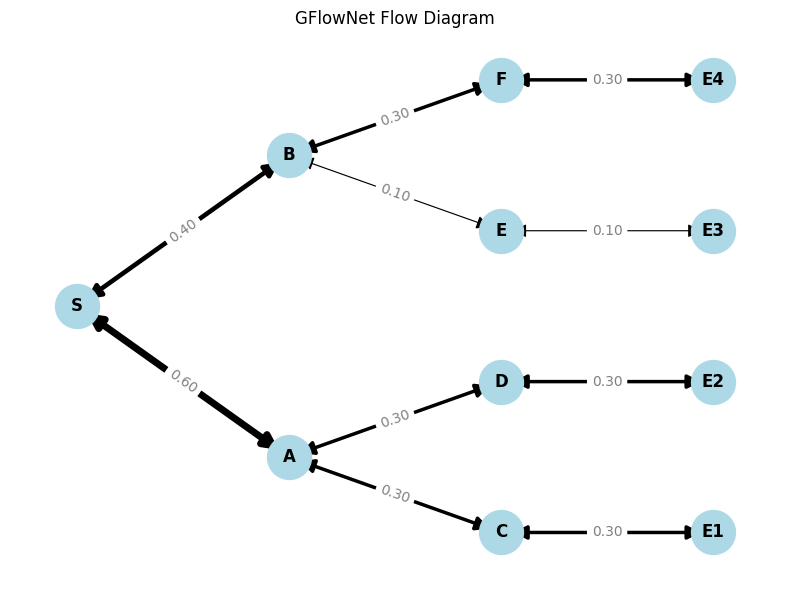

In [17]:
#!/usr/bin/env python3
import networkx as nx
import matplotlib.pyplot as plt

def create_gflownet(flows):
    """
    Build a DiGraph where each edge (u,v) has attribute 'flow'.
    flows: dict mapping (u,v) tuples to flow values (floats).
    """
    G = nx.DiGraph()
    for (u, v), f in flows.items():
        G.add_edge(u, v, flow=f)
    return G

def compute_balance(G):
    """
    For each node in G, compute total incoming and outgoing flow.
    Returns dict: node -> {'in': in_flow, 'out': out_flow}
    """
    balances = {}
    for node in G.nodes():
        in_flow  = sum(G.edges[u, node]['flow'] for u in G.predecessors(node))
        out_flow = sum(G.edges[node, v]['flow'] for v in G.successors(node))
        balances[node] = {'in': in_flow, 'out': out_flow}
    return balances

def validate_endpoints(G):
    """
    Ensure each terminal node (out_degree == 0) has at most one incoming edge.
    Raises ValueError if any end-node has in_degree > 1.
    """
    end_nodes = [n for n in G.nodes() if G.out_degree(n) == 0]
    violations = [(n, G.in_degree(n)) for n in end_nodes if G.in_degree(n) > 1]
    if violations:
        msgs = [f"  • Node '{n}' has {deg} incoming edges" for n, deg in violations]
        raise ValueError(
            "Endpoint uniqueness violated:\n" + "\n".join(msgs)
        )

def draw_gflownet(G, pos, title="GFlowNet Flow Diagram"):
    """
    Draw the GFlowNet using matplotlib:
     - Edge widths scaled by flow
     - Edge labels show the numeric flow
     - Nodes laid out according to pos dict
    """
    # Validate that each end-point is unique
    validate_endpoints(G)

    # Extract flows and normalize widths
    flows = nx.get_edge_attributes(G, 'flow')
    max_flow = max(flows.values()) if flows else 1.0
    widths   = [flows[e] / max_flow * 5 for e in G.edges()]  # scale factor = 5

    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    nx.draw_networkx_edges(
        G, pos,
        width=widths,
        arrowsize=20,
        arrowstyle='<|-|>'
    )

    edge_labels = {e: f"{flows[e]:.2f}" for e in flows}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='gray')

    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('gflownet_example.png')
    plt.show()
    

if __name__ == "__main__":
    # 1) Define flows: (source, target) -> flow value
    flows = {
        ('S', 'A'): 0.6,
        ('S', 'B'): 0.4,
        ('A', 'C'): 0.3,
        ('A', 'D'): 0.3,
        ('B', 'E'): 0.1,
        ('B', 'F'): 0.3,
        ('C','E1'): 0.3,
        ('D','E2'): 0.3,
        ('E','E3'): 0.1,
        ('F','E4'): 0.3,

    }

    # 2) (Optional) Specify positions for a nice layout
    pos = {
        'S':  (0,  0),
        'A':  (-1, -1),
        'B':  ( 1, -1),
        'C': (-1.5, -2),
        'D': ( -0.5, -2),
        'E': ( 0.5, -2),
        'F': ( 1.5, -2),
        'E1': (-1.5, -3),
        'E2': ( -0.5, -3),
        'E3': ( 0.5, -3),
        'E4': ( 1.5, -3),
    }
    pos = {
        'S': ( 0,  0 ),
        'A': ( 1, -1),
        'B': ( 1, 1 ),
        'C': ( 2, -1.5),
        'D': ( 2, -0.5),
        'E': ( 2, 0.5 ),
        'F': ( 2, 1.5 ),
        'E1':( 3, -1.5),
        'E2':( 3, -0.5),
        'E3':( 3, 0.5 ),
        'E4':( 3, 1.5 )
    }
    # 3) Create graph and compute balances
    G = create_gflownet(flows)
    balances = compute_balance(G)

    # 4) Print flow balance at each node
    print("Node balances (in_flow, out_flow):")
    for node, b in balances.items():
        print(f"  {node:>2}: in={b['in']:.2f}, out={b['out']:.2f}")

    # 5) Draw the network (will error if an endpoint has >1 parent)
    draw_gflownet(G, pos)



Node balances (in, out):
   S: in=0.00, out=1.00
   A: in=0.60, out=0.60
   B: in=0.40, out=0.40
   C: in=0.30, out=0.30
   D: in=0.30, out=0.30
   E: in=0.10, out=0.10
   F: in=0.30, out=0.30
  E1: in=0.30, out=0.00
  E2: in=0.30, out=0.00
  E3: in=0.10, out=0.00
  E4: in=0.30, out=0.00


TypeError: graphviz_layout() got an unexpected keyword argument 'args'